In [1]:
%cd ../../

/mnt/sda/otani/Experiments/eval-detection


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mmcv.utils.config import Config
from mim.utils import DEFAULT_CACHE_DIR
from src.extensions.dataset.coco_custom import CocoOtcDataset
import os
from mmdet.core.visualization.image import imshow_det_bboxes
from src.utils.neptune_utils import load_results
sns.set()
%matplotlib inline

In [3]:
model_name = "VFNet"
results_cc = load_results("EV-83", model_name)
# results_map = load_results("EV-91", model_name)

https://app.neptune.ai/mayu-ot/eval-detection/e/EV-83
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!


In [4]:
cfg = Config.fromfile(os.path.join(DEFAULT_CACHE_DIR,  "vfnet_r50_fpn_mstrain_2x_coco.py"))
dataset = CocoOtcDataset("data/coco/annotations/instances_val2017.json", pipeline=cfg.data.test.pipeline,test_mode=True)

loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


In [5]:
file_names = [x["file_name"] for x in dataset.data_infos]

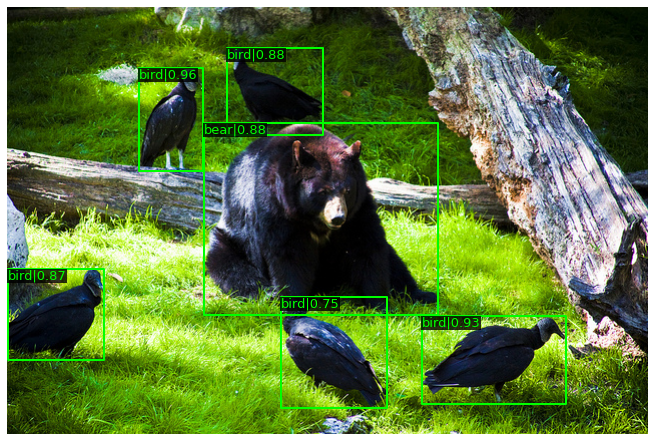

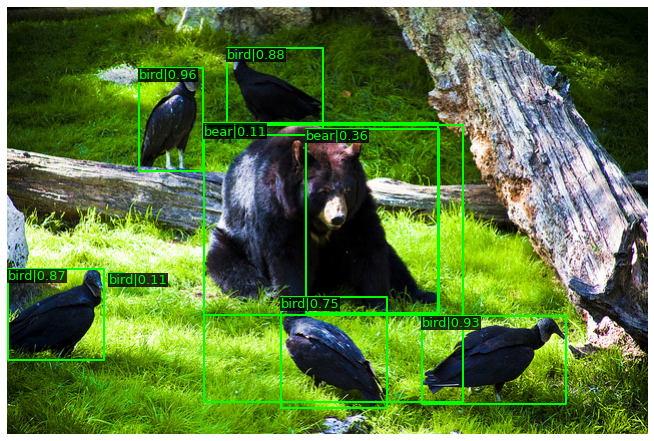

In [7]:
def cvrt_result(bbox_result):
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bbox_result)
    ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(bbox_result)
    return bboxes, labels

i = np.random.randint(0, len(results_cc))

for results in [results_cc, results_map]:
    bboxes, labels = cvrt_result(results[i])
    imshow_det_bboxes(f"data/coco/val2017/{file_names[i]}", bboxes, labels, class_names=dataset.CLASSES, score_thr=0.0)
    plt.show()


OTC DONE (t=15.63s).


<AxesSubplot:ylabel='Count'>

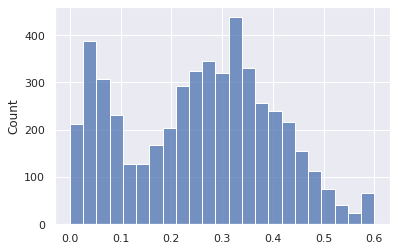

In [6]:
otc_costs = dataset.eval_OTC(results_cc, alpha=0.5, beta=0.6, use_dummy=True, get_average=False)
sns.histplot(otc_costs)

In [7]:
sort_idxs = np.argsort(otc_costs)
for i in sort_idxs[::1000]:
    print(otc_costs[i], file_names[i])

    bbox_result = results_cc[i]
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(bbox_result)
    ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(bbox_result)
    imshow_det_bboxes(f"data/coco/val2017/{file_names[i]}", bboxes, labels, class_names=dataset.CLASSES, score_thr=0.)
    plt.show()
plt.close("all")

0 000000049091.jpg


NameError: name 'results' is not defined

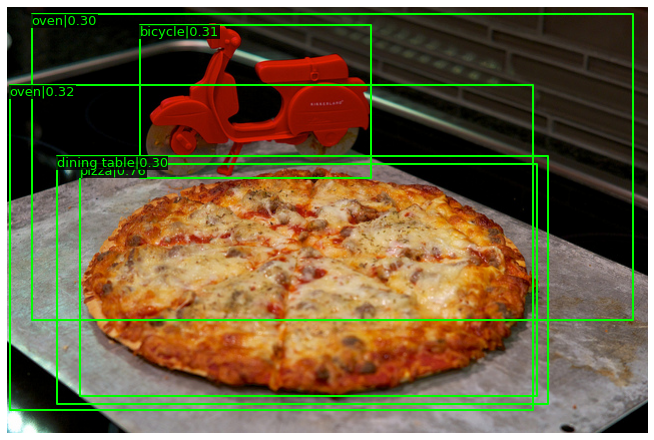